# Ejercicio 4

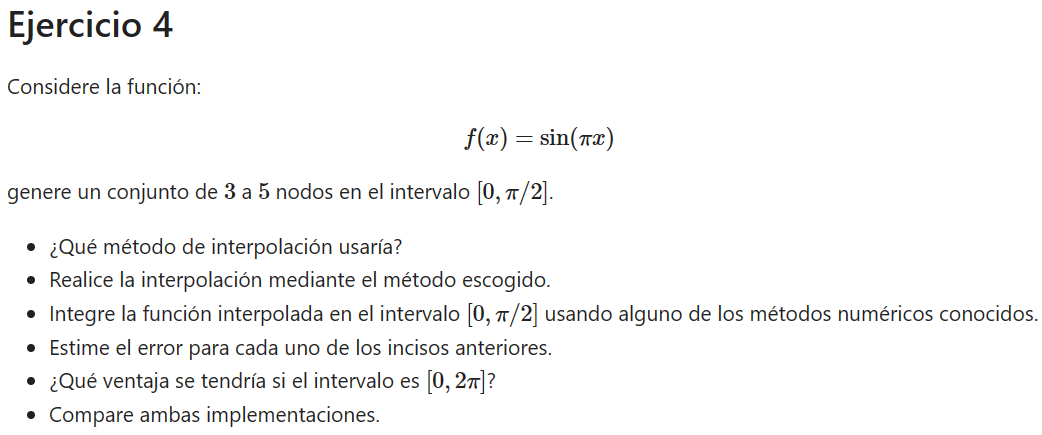

Polinomio: 2.85571923433793*x**3 - 8.39272848369117*x**2 + 5.51612375673219*x


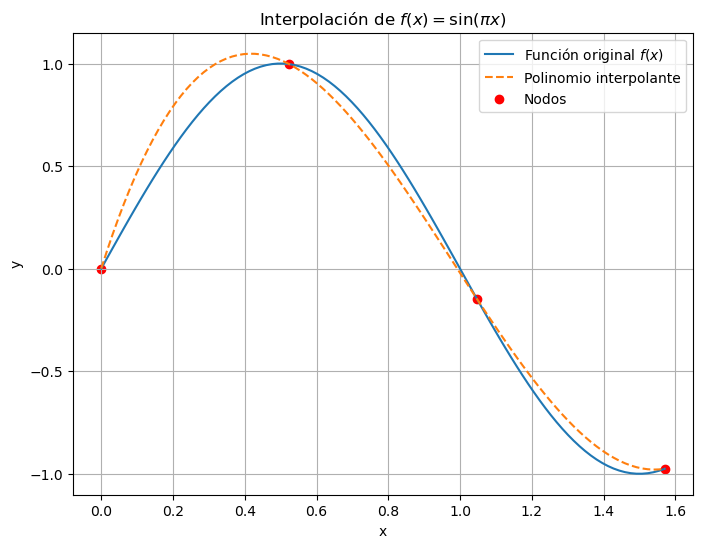

In [7]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Define la función f(x)
f = lambda x: np.sin(np.pi * x)

def legendre(dataxs, data_y):
    n = dataxs.size
    x = sym.symbols('x')
    polinomio = 0

    for i in range(n):
        l = 1
        for k in range(n):
            if k != i:
                l *= ((x - dataxs[k]) / (dataxs[i] - dataxs[k]))
        polinomio += l * data_y[i]

    polisimple = polinomio.expand().evalf()
    px = sym.lambdify(x, polisimple)
    
    return px, polisimple

# Datos para el polinomio
#dataxs = np.linspace(0, np.pi*2, 4)
dataxs = np.linspace(0, np.pi/2, 4)
datays = f(dataxs)
px, polisimple = legendre(dataxs, datays)
print(f"Polinomio: {polisimple}")

# Evaluación en puntos dentro del intervalo
xi = np.linspace(0, np.pi/2, 100)
yi = px(xi)

# Gráfica de la función original y el polinomio interpolante
plt.figure(figsize=(8, 6))
plt.plot(xi, f(xi), label='Función original $f(x)$')
plt.plot(xi, yi, '--', label='Polinomio interpolante')
plt.scatter(dataxs, datays, color='red', label='Nodos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de $f(x) = \\sin(\\pi x)$')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np

# Definimos la función a integrar
def f(x):
    return px(x)

# Definimos los limites de la integral
a = 0
b = np.pi/2
# Definimos el número de puntos de la cuadratura
N = 4

# Polinomios de Legendre
def legendre(n, x):
    if n == 0: # Si n = 0, entonces el polinomio de Legendre es 1
        return x*0 + 1.0
    elif n == 1: # Si n = 1, el polinomio de Legendre es x
        return x
    else: # Para n mayor a 1, el polinomio de Legendre se calcula por recursividad
        return ((2.0*n-1.0)*x*legendre(n-1,x)-(n-1)*legendre(n-2,x))/n

# Derivada de los polinomios de Legendre    
def dlegendre(n, x):
    x = np.array(x)
    if n == 0: # Si n es 0, la derivada da 0
        return x*0
    elif n == 1: # si n es 1, la derivada es 1
        return x*0 + 1.0
    else: # Para n mayor que 1, la derivada se calculará por recursividad y la regla del producto para derivadas
        return (n/(x**2-1.0))*(x*legendre(n,x)-legendre(n-1,x))

# Definimos un método de la secante para encontrar las raíces de los polinomios de Legendre
# Mi método de la secante:
def secv1(f, p0, p1, TOL=1e-5, N0=100):
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= N0:
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if abs(p - p1) < TOL:
            return p
        i += 1
        p0, q0 = p1, q1
        p1, q1 = p, f(p)
    print("Se alcanzó el número máximo de iteraciones")
    return p

# Calculamos las raíces de los polinomios con el método de la secante
def legroots(n, delt=.2, Nit=1000, error='dist', eps=1e-05):
    roots = np.zeros(n) # iniciamos en ceros un arreglo donde se almacenan las raíces
    npos = n//2 # pq son simétricos
    
    f = lambda x: legendre(n, x)  # recordar que da dos salidas y quiero solo el Pn
    for i in range(npos): # Para cada punto hasta la mitad de puntos
        p0 = np.cos(np.pi*(4*i+3)/(4*n+2))  # semilla o aproximación para el método de la secante
        p1 = p0 + delt # La semilla para p1
        root = secv1(f, p0, p1, TOL=eps, N0=Nit) # Encontramos las raices
        roots[i] = -root # Almacenamos los negativos en el arreglo
        roots[-1-i] = root # Almacenamos los positivos en el arreglo
    return roots # Devolvemos un arreglo de las raíces encontradas

# Calculamos pesos y nodos para la cuadratura
def gau_param(n, delt=.2, Nit=1000, error='dist', eps=1e-05): 
    # Las raíces encontradas ahora son los nodos para la cuadratura
    xroot = legroots(n, delt=delt, Nit=Nit, error=error, eps=eps)
    dPn = legendre(n, xroot)[1] # Calculamos la derivada de los polinomios en los nodos
    # Pesos para la cuadratura
    cj = 2.0 / ((1.0 - xroot**2) * (dlegendre(N, xroot)**2))
    return xroot, cj # Devuelve nodos y pesos

# Calculamos la integral en los intervalos dados
def gauInt(f, interv, Npts, delt=0.2, Nit=1000, error='dist', eps=1e-05):
    a, b = min(interv), max(interv) # Nuestros limites de integración
    
    # Utilizamos los nodos y los pesos en estas nuevas variables
    xs, cs = gau_param(Npts, delt=delt, Nit=Nit, error=error, eps=eps)
    
    # Aplicando la fórmula, cambio de variables
    coeffp = 0.5*(b+a)
    coeffm = 0.5*(b-a)
    
    ts = coeffp + coeffm*xs # Nueva función t
    fk = cs*f(ts) # Calculamos los valores de la función en los nodos y multiplicamos por los pesos
    val = coeffm*np.sum(fk) # Hacemos la suma de los valores y multiplicamos por el coeficiente
    return val # El resultado de nuestra integral

interv = [0., np.pi/2] # Intervalo
val = gauInt(f, interv, N, eps=1e-11)
print('El resultado es ', val)

El resultado es  0.3088957094029954


### ¿Qué método de interpolación usaría?
Interpolación de Lagrange y para la integral; método de Gauss- Legendre